# MS5114 Group Project - Group 16 "Binary Brigade" - Sentimental Analysis

### Business Use Case for Rotten Tomatoes: Enhancing User Experience and Engagement through Sentimental Analysis
 
#### Business Context:
Rotten Tomatoes, widely recognized for aggregating movie reviews and ratings, serves a dual audience of film enthusiasts and industry professionals. Viewers rely on the platform for guidance on what to watch, whereas filmmakers and studios look to the compiled scores to understand audience reactions and forecast potential revenue from ticket sales.
 
#### Business Problem:
Rotten Tomatoes encounters the difficulty of conveying the complexity of viewer emotions. The simplistic Fresh or Rotten ratings and collective user scores offer a numerical evaluation but miss qualitative depth. This shortfall might cause users to dismiss movies with mixed yet meaningful critiques and prevent industry experts from comprehensively understanding the audience's response.
 
 
#### Text Classification Task:
The text classification task at hand involves training a machine learning model on a large dataset of user reviews scraped from Rotten Tomatoes. The model will categorize each review as positive, neutral, or negative. This classification will be used to Aggregate sentiment scores for individual films, Create sentiment-based review summaries for quick user assessment, Segment user reviews according to sentiment to facilitate easier browsing and analysis.

In [13]:
# Import necessary libraries
from nltk.corpus import PlaintextCorpusReader  # For reading the corpus
from sklearn.feature_extraction.text import CountVectorizer  # For text vectorization
from sklearn.metrics import pairwise_distances  # For calculating pairwise distances
import seaborn as sns  # For creating visualizations
import requests  # For making HTTP requests
from bs4 import BeautifulSoup  # For parsing HTML
import pandas as pd  # For data manipulation and analysis

import matplotlib.pyplot as plt  # For plotting

We have selected 100 movies for review analysis.

In [38]:
urls = [
    'https://www.rottentomatoes.com/m/ouija_origin_of_evil/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/malignant_2021/reviews?type=user',
    'https://www.rottentomatoes.com/m/bird_box/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/the_rental_2020/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/im_thinking_of_ending_things/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/cam/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/apostle_2018/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/1922_2017/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/deliver_us_from_evil_2014/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/white_noise_2022/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/the_first_purge/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/annabelle/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/nightmare_on_elm_street_2010/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/split_2017/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/the_autopsy_of_jane_doe/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/it_follows/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/the_babadook/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/insidious/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/it_2017/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/nightmare_on_elm_street/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/scary_stories_to_tell_in_the_dark/reviews?type=verified_audience&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/resident_evil/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/wes_cravens_new_nightmare/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/fear_street_part_one_1994/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/death_note_2017/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews'
,'https://www.rottentomatoes.com/m/heart_of_the_hunter/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/rebel_moon_part_1_a_child_of_fire/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/mortal_engines/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/lift_2024/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/the_kitchen_2023/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/the_stranger_2022/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/triple_frontier/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/godzilla_2014/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/damsel_2023/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/ghostbusters_2016/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/drive_away_dolls/reviews?type=verified_audience&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/the_matrix_resurrections/reviews?type=verified_audience&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/king_kong/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/the_northman/reviews?type=verified_audience&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/the_vault_2021/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/iss/reviews?type=verified_audience&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/geostorm/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/captain_marvel/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/pirates_of_the_caribbean_dead_men_tell_no_tales/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/the_bricklayer_2023/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/suicide_squad_2016/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/maze_runner_the_scorch_trials/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/last_seen_alive/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/57_seconds/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
'https://www.rottentomatoes.com/m/heart_of_stone_2023/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews'
,'https://www.rottentomatoes.com/m/the_beast_2023/reviews?type=user',
'https://www.rottentomatoes.com/m/someone_like_you_2024/reviews?type=user',
'https://www.rottentomatoes.com/m/musica/reviews?type=user',
'https://www.rottentomatoes.com/m/the_greatest_hits/reviews?type=user',
'https://www.rottentomatoes.com/m/a_fragile_flower/reviews?type=user',
'https://www.rottentomatoes.com/m/poor_things/reviews?type=user',
'https://www.rottentomatoes.com/m/glitter_and_doom/reviews?type=user',
'https://www.rottentomatoes.com/m/with_love_and_a_major_organ',
'https://www.rottentomatoes.com/m/the_tearsmith/reviews?type=user',
'https://www.rottentomatoes.com/m/anyone_but_you_2023/reviews?type=user',
'https://www.rottentomatoes.com/m/365_days_2020/reviews?type=user',
'https://www.rottentomatoes.com/m/asteroid_city/reviews?type=user',
'https://www.rottentomatoes.com/m/upgraded/reviews?type=user',
'https://www.rottentomatoes.com/m/one_day_2014/reviews?type=user',
'https://www.rottentomatoes.com/m/the_oath_2023/reviews?type=user',
'https://www.rottentomatoes.com/m/original_sin/reviews?type=user',
'https://www.rottentomatoes.com/m/the_american_society_of_magical_negroes/reviews?type=user',
'https://www.rottentomatoes.com/m/ricky_stanicky/reviews?type=user',
'https://www.rottentomatoes.com/m/lousy_carter/reviews?type=user',
'https://www.rottentomatoes.com/m/next_goal_wins_2023/reviews?type=user',
'https://www.rottentomatoes.com/m/drive_away_dolls/reviews?type=user',
'https://www.rottentomatoes.com/m/lift_2024/reviews?type=user',
'https://www.rottentomatoes.com/m/asteroid_city/reviews?type=user',
'https://www.rottentomatoes.com/m/please_dont_destroy_the_treasure_of_foggy_mountain/reviews?type=user',
'https://www.rottentomatoes.com/m/she_came_to_me/reviews?type=user',
    'https://www.rottentomatoes.com/m/road_house/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/m/damsel_2023/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
    'https://www.rottentomatoes.com/tv/3_body_problem/s01/reviews?type=user',
    'https://www.rottentomatoes.com/m/luca_2021/reviews?type=user',
    'https://www.rottentomatoes.com/m/migration_2023/reviews?type=user',
    'https://www.rottentomatoes.com/m/they_shot_the_piano_player/reviews?type=user',
    'https://www.rottentomatoes.com/m/the_peasants/reviews?type=user',
    'https://www.rottentomatoes.com/m/cabrini/reviews?type=user',
    'https://www.rottentomatoes.com/m/family_star/reviews?type=user',
    'https://www.rottentomatoes.com/m/green_fish/reviews?type=user',
    'https://www.rottentomatoes.com/m/asphalt_city/reviews?type=user',
    'https://www.rottentomatoes.com/m/a_fragile_flower/reviews?type=user',
    'https://www.rottentomatoes.com/m/the_sweet_east/reviews?type=user',
    'https://www.rottentomatoes.com/m/the_american_society_of_magical_negroes/reviews?type=user',
    'https://www.rottentomatoes.com/m/coup_de_chance_2023/reviews?type=user',
    'https://www.rottentomatoes.com/m/kung_fu_panda_4/reviews?type=user',
    'https://www.rottentomatoes.com/m/yolo/reviews?type=user',
    'https://www.rottentomatoes.com/m/do_not_expect_too_much_from_the_end_of_the_world/reviews?type=user',
    'https://www.rottentomatoes.com/m/household_saints/reviews?type=user',
    'https://www.rottentomatoes.com/m/crew_2024/reviews?type=user',
    'https://www.rottentomatoes.com/m/ghostbusters_frozen_empire/reviews?type=user',
    'https://www.rottentomatoes.com/m/light_2024/reviews?type=user',
    'https://www.rottentomatoes.com/m/immaculate_2024/reviews?type=user',
    'https://www.rottentomatoes.com/m/madame_web/reviews?type=user',
    'https://www.rottentomatoes.com/m/musica/reviews?type=user',
    'https://www.rottentomatoes.com/m/a_cats_life/reviews?type=user',
    'https://www.rottentomatoes.com/m/arthur_the_king/reviews?type=user'
    
]

## Count the URLs
In this code, len(urls) is used to determine the number of URLs in the urls list, and the result is stored in the variable count_urls.

In [34]:
# Count the number of URLs in the 'urls' list
count_urls = len(urls)

# Print the count of URLs
count_urls

102

# Web Scrapping


This code scrapes movie reviews from Rotten Tomatoes URLs using requests for HTTP requests and BeautifulSoup for HTML parsing. It defines a list of URLs to scrape, iterates through each URL, extracts review information such as review text, date, reviewer name, and review score from the HTML content, and stores this information in a list of dictionaries. It then creates a pandas DataFrame from the list of dictionaries and saves it to a CSV file. The scraping process is completed once all URLs are processed, and a message indicating the completion is printed.


In [35]:
import requests  # For making HTTP requests
from bs4 import BeautifulSoup  # For parsing HTML

# List of URLs to scrape
# urls = [
#     'https://www.rottentomatoes.com/m/road_house/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
#     'https://www.rottentomatoes.com/m/damsel_2023/reviews?type=user&intcmp=rt-scorecard_audience-score-reviews',
#     'https://www.rottentomatoes.com/tv/3_body_problem/s01/reviews?type=user',
# ]

reviews_data = []  # Initialize an empty list to store review data

# Iterate through each URL in the 'urls' list
for url in urls:
    # Send a GET request to the URL
    response = requests.get(url)
    
    # Parse the HTML content of the response using BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract the title from the URL
    title = url.split('/')[4] if '/m/' in url else url.split('/')[2] 
    
    # Find all review containers on the page
    review_containers = soup.find_all("div", class_="audience-review-row")
    
    # Iterate through each review container
    for container in review_containers:
        # Initialize a dictionary to store review information
        review = {
            'title': title,
            'review_text': "Review not found",
            'review_date': "Date not found",
            'reviewer_name': "Reviewer not found",
            'review_score': 0,  
        }
        
        # Extract review text if available
        review_element = container.find("p", class_="audience-reviews__review js-review-text")
        if review_element:
            review['review_text'] = review_element.get_text(strip=True)
        
        # Extract review date if available
        date_element = container.find("span", class_="audience-reviews__duration")
        if date_element:
            review['review_date'] = date_element.get_text(strip=True)
        
        # Extract reviewer name if available
        name_element = container.find("a", class_="audience-reviews__name")
        if name_element:
            review['reviewer_name'] = name_element.get_text(strip=True)
        
        # Extract review score based on filled stars
        score_element = container.find("span", class_="star-display")
        if score_element:
            filled_stars = score_element.find_all("span", class_="star-display__filled")
            review['review_score'] = len(filled_stars)  # Count of filled stars represents the score
        
        # Append the review dictionary to the list of reviews
        reviews_data.append(review)

# Create a DataFrame from the list of reviews
df_reviews = pd.DataFrame(reviews_data)

# Save the DataFrame to a CSV file
df_reviews.to_csv('rottentomatoes_reviews.csv', index=False)

# Print a message indicating that the scraping is completed
print("Scraping completed and data saved to rottentomatoes_reviews.csv")


Scraping completed and data saved to rottentomatoes_reviews.csv


In [14]:
# storing the csv file data into the dataframe
df = pd.read_csv("C:/Users/welcome/Downloads/rottentomatoes_reviews 1.csv")

In [15]:
# storing in df_reviews dataframe
df_reviews= df

In [16]:
#printing the dataframe df_reviews
df_reviews

,title,review_text,review_date,reviewer_name,review_score
0,ouija_origin_of_evil,Good popcorn horror pic with a few funny momen...,"Apr 3, 2024",Joshua F,3
1,ouija_origin_of_evil,"This one was nice. Normally, horror movies can...","Apr 3, 2024",Jose Raul B,4
2,ouija_origin_of_evil,Dreadful rubbish. Not scary or fun to watch.,"Mar 28, 2024",Colin R,2
3,ouija_origin_of_evil,I can't believe so many people didn't get it. ...,"Mar 24, 2024",OLD B,5
4,ouija_origin_of_evil,It's great except for two things: it's too sim...,"Feb 23, 2024",billybob 1,4
...,...,...,...,...,...
1822,arthur_the_king,"Nice, feel good story. Enjoyed the movie.","Apr 6, 2024",Reviewer not found,4
1823,arthur_the_king,What a refreshing story considering the times ...,"Apr 6, 2024",Brian C,5
1824,arthur_the_king,A heartwarming story.,"Apr 6, 2024",Reviewer not found,4
1825,arthur_the_king,"Great story, just a wonderful movie for everyo...","Apr 6, 2024",Reviewer not found,5


The output displayed is a tabular representation of scraped movie reviews from Rotten Tomatoes, organized into a pandas DataFrame. Each row of the DataFrame corresponds to a single review and contains several columns: "title" for the movie or TV show title, "review_text" for the actual review content, "review_date" for the date of the review, "reviewer_name" for the reviewer's name (if available), and "review_score" for the rating given by the reviewer. The DataFrame provides a structured format for analyzing and exploring the reviews, allowing for further investigation into sentiment analysis, review trends, and reviewer demographics.

# Distribution of Review Scores

This code uses the seaborn library to create a count plot, which displays the distribution of review scores from a DataFrame (df_reviews). The x-axis represents the review scores, while the y-axis represents the count of reviews for each score. The plot provides a visual summary of how reviews are distributed across different score categories, helping to understand the overall sentiment or opinion of reviewers

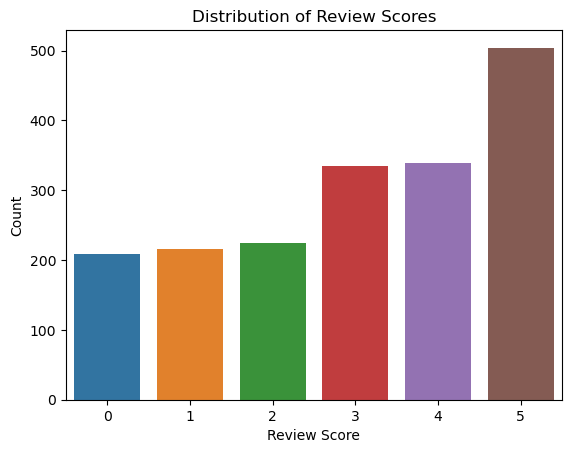

In [17]:
# Create a count plot to visualize the distribution of review scores
sns.countplot(x='review_score', data=df_reviews)

# Add a title to the plot
plt.title('Distribution of Review Scores')

# Add labels to the x and y axes
plt.xlabel('Review Score')
plt.ylabel('Count')

# Display the plot
plt.show()


The output presents the distribution of review scores extracted from the review pages of 100 movies. This analysis provides insights into the distribution of sentiments expressed by viewers, highlighting trends in audience reception and indicating the prevalence of positive, neutral, and negative opinions across the dataset.

# Mapping Review Scores to Sentiments

This code defines a function called score_to_sentiment that takes a review score as input and returns a sentiment category ('Negative', 'Neutral', or 'Positive') based on the score. The function categorizes scores of 2 or lower as 'Negative', scores of 3 as 'Neutral', and scores above 3 as 'Positive'.

The function is then applied to the 'review_score' column of the df_reviews DataFrame using the apply method. The result is stored in a new column called 'sentiment', which contains the sentiment category corresponding to each review score.

In [20]:
# Define a function to convert review scores to sentiment categories
def score_to_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply the score_to_sentiment function to create a new 'sentiment' column in the DataFrame
df_reviews['sentiment'] = df_reviews['review_score'].apply(score_to_sentiment)


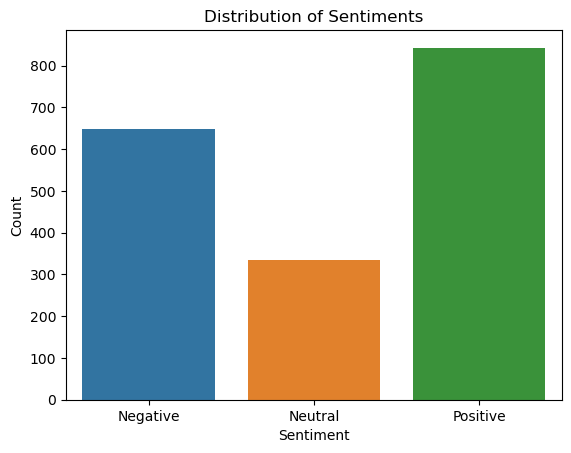

In [19]:
# Create a count plot to visualize the distribution of sentiments
sns.countplot(x='sentiment', data=df_reviews, order=['Negative', 'Neutral', 'Positive'])

# Add a title to the plot
plt.title('Distribution of Sentiments')

# Add labels to the x and y axes
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display the plot
plt.show()

This analysis reveals a skewed distribution of sentiments in the movie reviews sourced from the URLs. With a predominant number of positive reviews, followed by a smaller proportion of negative and neutral reviews, the dataset reflects a trend towards positivity in audience sentiments.

# Review Length Analysis

In order to figure out wheather the length of review is impacting the score or not, we went ahead with check the lengh of review text

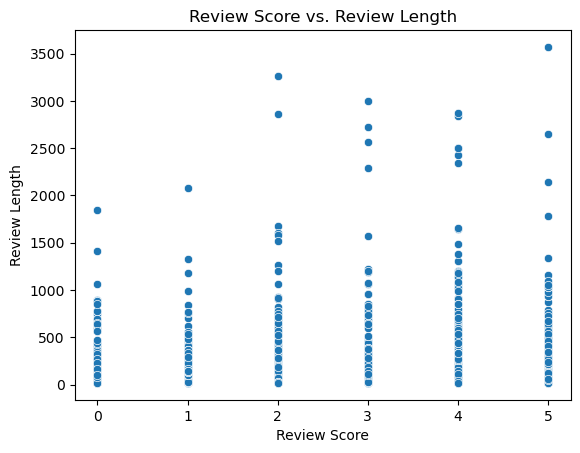

In [21]:
# Calculate the length of each review text and store it in a new column 'review_length'
df_reviews['review_length'] = df_reviews['review_text'].apply(len)

# Create a scatter plot to visualize the relationship between review score and review length
sns.scatterplot(x='review_score', y='review_length', data=df_reviews)

# Add a title to the plot
plt.title('Review Score vs. Review Length')

# Add labels to the x and y axes
plt.xlabel('Review Score')
plt.ylabel('Review Length')

# Display the plot
plt.show()

The above scatter plot shows the relationship between 'Review Score' on the x-axis and 'Review Length' on the y-axis. The data points are distributed across the plot, corresponding to the scores ranging from 0 to 5 and the lengths varying widely.

Observations:

There is a dense clustering of points at the lower end of the review length, suggesting many reviews are short irrespective of the score given.
Across all scores, there are reviews with very long lengths, but they are fewer in number compared to short reviews.
There doesn't seem to be a clear, strong correlation between review length and score; however, a minor observation could be that the very long reviews do not have very low scores (0 or 1), indicating that perhaps more effort (in terms of length) might correspond to a more moderate or positive review score.

In [22]:
# Convert the 'review_date' column to datetime format
df_reviews['review_date'] = pd.to_datetime(df_reviews['review_date'])

In [23]:
df_reviews

,title,review_text,review_date,reviewer_name,review_score,sentiment,review_length
0,ouija_origin_of_evil,Good popcorn horror pic with a few funny momen...,2024-04-03,Joshua F,3,Neutral,97
1,ouija_origin_of_evil,"This one was nice. Normally, horror movies can...",2024-04-03,Jose Raul B,4,Positive,163
2,ouija_origin_of_evil,Dreadful rubbish. Not scary or fun to watch.,2024-03-28,Colin R,2,Negative,44
3,ouija_origin_of_evil,I can't believe so many people didn't get it. ...,2024-03-24,OLD B,5,Positive,212
4,ouija_origin_of_evil,It's great except for two things: it's too sim...,2024-02-23,billybob 1,4,Positive,144
...,...,...,...,...,...,...,...
1822,arthur_the_king,"Nice, feel good story. Enjoyed the movie.",2024-04-06,Reviewer not found,4,Positive,42
1823,arthur_the_king,What a refreshing story considering the times ...,2024-04-06,Brian C,5,Positive,243
1824,arthur_the_king,A heartwarming story.,2024-04-06,Reviewer not found,4,Positive,21
1825,arthur_the_king,"Great story, just a wonderful movie for everyo...",2024-04-06,Reviewer not found,5,Positive,56


# Preprocessing the Review Text

This code defines a function preprocess_text that preprocesses text data by converting it to lowercase, removing non-word characters, URLs, HTML tags, punctuation, newline characters, and words containing numbers. The function is then applied to the 'review_text' column of the df_reviews DataFrame to preprocess the text data in that column.

In [24]:
import re  # Import the regular expression module
import string  # Import the string module

# Define a function to preprocess text data
def preprocess_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub('\\W', ' ', text)  # Remove all non-word characters
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newline characters
    text = re.sub('\w*\d\w*', '', text)  # Remove words containing numbers
    return text

# Apply the preprocess_text function to the 'review_text' column of the DataFrame
df_reviews['review_text'] = df_reviews['review_text'].apply(preprocess_text)

# Converting Text to Features

This code imports the TfidfVectorizer class from the sklearn.feature_extraction.text module to convert text data into a TF-IDF matrix. It creates an instance of TfidfVectorizer, fits and transforms the 'review_text' column of the DataFrame to create the TF-IDF matrix X, and assigns the 'sentiment' column of the DataFrame to y.

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Import the TF-IDF vectorizer

# Create an instance of the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'review_text' column of the DataFrame to create the TF-IDF matrix X
X = vectorizer.fit_transform(df_reviews['review_text'])

# Assign the 'sentiment' column of the DataFrame to y
y = df_reviews['sentiment']

# Splitting the Data


In [26]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function

# Split the data into training and testing sets
# X_train and y_train are the training features and labels, respectively
# X_test and y_test are the testing features and labels, respectively
# The test_size parameter specifies the proportion of the dataset to include in the test split (here, 20%)
# The random_state parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building

# 1. Logistic Regression

# Training a Model

This code imports the LogisticRegression class from sklearn.linear_model and creates an instance of the logistic regression model (lr) with specified parameters (max_iter=1000 and n_jobs=-1). The model is then fitted to the training data (X_train and y_train). The max_iter parameter specifies the maximum number of iterations for the solver to converge, and n_jobs specifies the number of CPU cores to use (-1 uses all available cores).

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, n_jobs=-1) 
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000, n_jobs=-1)

The output indicates a logistic regression model is created with a maximum of 1000 iterations for convergence and utilizing all available CPU cores for training.

# Making Predictions and Evaluating the Model

Here we calculate the accuracy of the Logistic Regression model (lr) on the test set (X_test, y_test) using the accuracy_score function from sklearn.metrics and prints the result. It also generates a classification report using the classification_report function and prints it to evaluate the model's performance in terms of precision, recall, and F1-score for each class.

In [28]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report  # For evaluating model performance

# Make predictions using the trained Logistic Regression model
pred_lr = lr.predict(X_test)

# Calculate and print the accuracy of the model
print("Accuracy:", accuracy_score(y_test, pred_lr))

# Generate and print a classification report for the model
print("Classification Report:")
print(classification_report(y_test, pred_lr))


Accuracy: 0.7158469945355191
Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.77      0.75       127
     Neutral       0.45      0.15      0.22        62
    Positive       0.73      0.88      0.80       177

    accuracy                           0.72       366
   macro avg       0.64      0.60      0.59       366
weighted avg       0.68      0.72      0.68       366



-- Accuracy 

Accuracy (0.72): The model correctly predicts the sentiment of approximately 72% of the reviews in your test set. This is a solid starting point, indicating that the model has learned to a reasonable extent to differentiate between sentiments based on review texts.

-- Precision

Negative (0.73): When the model predicts a review to be negative, it is correct 73% of the time.
Neutral (0.45): When the model predicts a review to be neutral, it is correct 45% of the time, suggesting it struggles more with identifying neutral sentiments accurately.
Positive (0.73): When the model predicts a review to be positive, it is correct 73% of the time, showing a similar precision to negative predictions.

-- Recall

Negative (0.77): Of all the actual negative reviews, the model correctly identifies 77% of them as negative.
Neutral (0.15): The model only correctly identifies 15% of the actual neutral reviews, indicating it often misclassifies neutral reviews as either positive or negative.
Positive (0.88): The model is quite effective at identifying positive reviews, correctly classifying 88% of all actual positive reviews.

-- F1-Score

This is the harmonic mean of precision and recall, providing a single metric to evaluate the balance between them. Higher F1-scores indicate better balanced precision and recall.
Negative (0.75) and Positive (0.80) have higher F1-scores, showing the model performs relatively well on these sentiments. However, the Neutral (0.22) F1-score is significantly lower, highlighting the model's difficulty in handling neutral sentiments effectively.

-- Interpretation for Rotten Tomatoes

The model is quite proficient at identifying positive and negative sentiments, with a decent balance between precision and recall, indicated by the F1-scores. This suggests it can be useful for filtering out clearly positive and negative reviews.

The low recall and F1-score for neutral reviews indicate a challenge. The model tends to confuse neutral sentiment with either positive or negative, which could be due to the inherent ambiguity of neutral language or a lack of distinguishing features in the text.

The overall accuracy suggests that the model is a good starting point for automated sentiment analysis of movie reviews on Rotten Tomatoes. However, improvements are needed, especially in accurately identifying neutral sentiments and possibly reducing false positives/negatives for a more balanced prediction across all sentiment classes.


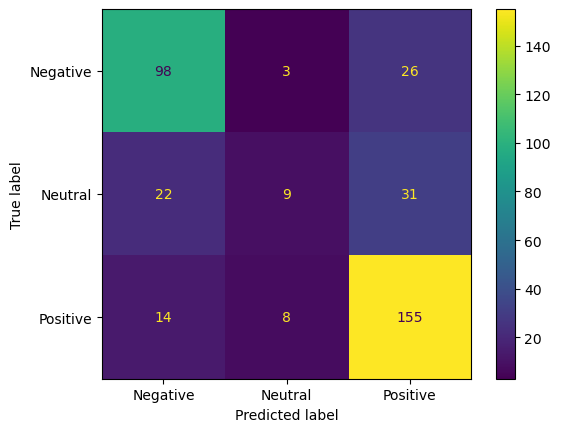

In [29]:
# Import necessary libraries
from sklearn.metrics import ConfusionMatrixDisplay  # For displaying confusion matrix
import matplotlib.pyplot as plt  # For plotting

# Create confusion matrix display from predictions
conf_matrix_display = ConfusionMatrixDisplay.from_predictions(y_test, pred_lr)

# Display the confusion matrix plot
plt.show()

The confusion matrix is explaining the performance of a classification model used to predict sentiment labels (Negative, Neutral, and Positive) for a set of data. The matrix is organized with the true labels (actual sentiment) on the Y-axis (rows) and the predicted labels (sentiment predicted by the model) on the X-axis (columns). Here's what the values indicate:

1.True Positives (TP): The cells on the diagonal from top left to bottom right (98, 9, 155) represent the number of predictions that were correct. For example, there were 155 instances where the model correctly predicted the positive sentiment.

2.False Negatives (FN): Cells below the diagonal represent instances where the model incorrectly predicted a negative sentiment when the actual sentiment was more positive. For example, there were 14 instances where the model predicted negative instead of the true positive sentiment.

3.False Positives (FP): Cells above the diagonal represent instances where the model incorrectly predicted a positive sentiment when the actual sentiment was more negative. For example, there were 26 instances where the model predicted positive instead of the true negative sentiment.

4.True Negatives (TN): While not directly shown in a multi-class confusion matrix, true negatives for a given class in such a setup would be the sum of all cells not in the row or column for that class.

In summary, the confusion matrix provides a detailed account of the model's predictions:

1.Negative Sentiment: The model predicted negative sentiment correctly 98 times but mistakenly classified 3 as neutral and 26 as positive.

2.Neutral Sentiment: The model correctly identified neutral sentiment 9 times, while 22 were wrongly classified as negative, and 31 as positive.

3.Positive Sentiment: The model was successful in predicting positive sentiment 155 times, but 14 were misclassified as negative and 8 as neutral.

This breakdown allows the model's developers to assess not just overall accuracy but also to delve deeper into how the model behaves for each category, potentially guiding improvements to the model or to the data preprocessing steps. has context menu Compose

# 2.XG boost Classifier

This code snippet first imports the LabelEncoder class from the sklearn.preprocessing module, which is used to encode the categorical sentiment labels into integers. This encoding is necessary for the XGBoost classifier, as it requires numerical inputs. The fit_transform method is used to fit the encoder to the training labels (y_train) and transform them into encoded integers, stored in y_train_encoded. The transform method is then applied to the test labels (y_test) to ensure consistency in encoding.

Next, the XGBClassifier class is imported from the xgboost library. An instance of the XGBClassifier is created with use_label_encoder=False to avoid warnings about the deprecated label encoder in XGBoost and eval_metric='mlogloss' to specify the evaluation metric as multi-class logarithmic loss. Finally, the classifier is trained using the fit method with the training features (X_train) and the encoded training labels (y_train_encoded).

In [30]:
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels to integers for the XGB classifier
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [31]:
from xgboost import XGBClassifier  # Import XGBClassifier from the XGBoost library

In [32]:
# Training the XGB Classifier with corrected labels
xgb_corrected = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_corrected.fit(X_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

The output displays the parameters and their current settings for an XGBoost classifier (XGBClassifier). XGBoost is a popular machine learning library known for its efficiency and effectiveness in handling various machine learning tasks, particularly in the realm of gradient boosting. The parameters shown include settings related to the model's architecture (e.g., booster, num_boost_round, num_parallel_tree), regularization (gamma, lambda), learning rate (eta), and objective function (objective). Each parameter plays a role in controlling the behavior of the XGBoost model during training and can be tuned to optimize model performance for specific tasks and datasets.

In [33]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Predict on the test set with XGBoost
pred_xgb_encoded_test = xgb_corrected.predict(X_test)

In [34]:
# Decode the predictions
pred_xgb_test = label_encoder.inverse_transform(pred_xgb_encoded_test)

In [35]:
# Calculate accuracy
accuracy_xgb_test = accuracy_score(y_test, pred_xgb_test)
print(f'Accuracy of XGBoost classifier: {accuracy_xgb_test}')

Accuracy of XGBoost classifier: 0.6967213114754098


This output indicates that the accuracy of the XGBoost classifier on the test dataset is approximately 0.697, which means that it correctly predicted the sentiment labels for about 69.7% of the movie reviews in the test dataset.

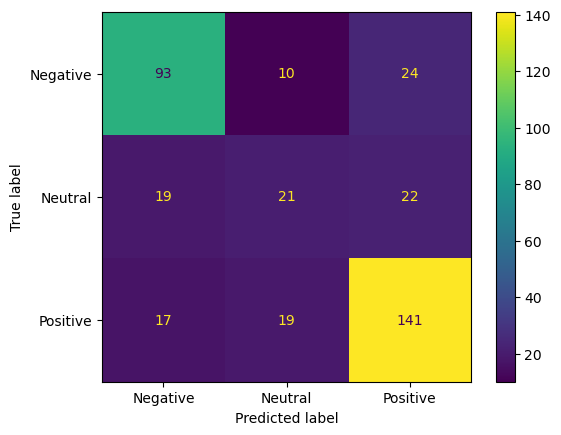

In [36]:
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_xgb_test)
plt.show()

This is the confusion matrix that's generated from predictions made by an XGBoost classifier, and it visualizes the performance of the model in classifying sentiments into three categories: Negative, Neutral, and Positive.
 
Here's what the matrix is displaying:
 
- **Rows (True Label):** Each row represents the actual classes as they are in the test data (`y_test`). From top to bottom, the rows correspond to Negative, Neutral, and Positive sentiments.
- **Columns (Predicted Label):** Each column represents the classes as predicted by the XGBoost model (`pred_xgb_test`). From left to right, the columns correspond to Negative, Neutral, and Positive predictions.
- **Cells (Counts):** Each cell contains the number of observations. For example, the model predicted 93 instances as Negative, which were actually Negative (True Negative). The cell with 141 indicates the number of instances that were actually Positive and predicted as Positive (True Positive).
- **Off-Diagonal Cells (Misclassifications):** The off-diagonal cells indicate where the model made incorrect predictions. For instance, there were 17 instances that were actually Positive but were incorrectly predicted as Negative (False Negative).
- **Color Intensity:** The intensity of the color corresponds to the number of observations, with darker colors indicating higher numbers. This is typically used to quickly identify which classes are being confused.
 
From the confusion matrix, we can make several observations about the model performance:
 
- The model is relatively strong at identifying Positive sentiment correctly.
- There's some confusion between Neutral and Negative classes, as well as Neutral and Positive.
- The model seems to struggle more with correctly identifying Neutral sentiment, as indicated by the relatively balanced misclassifications across Negative and Positive predictions for the actual Neutral class.
 
The calculated accuracy from the code snippet (`accuracy_xgb_test`) quantifies the overall performance of the model, but the confusion matrix gives a more detailed view into how the model performs for each individual class.

# Manual Testing

This function manual_testing_combined(review) takes a single movie review as input and processes it to predict sentiment labels using two different models, Logistic Regression and XGBoost. It first preprocesses the input review and converts it into a TF-IDF vector. It then uses the Logistic Regression model (lr) to predict the sentiment label for the review. Additionally, it employs the XGBoost model (xgb_corrected) to make a prediction, using the TF-IDF vector, and decodes the predicted label using label_encoder. The function returns both the predicted sentiment label from Logistic Regression (pred_lr_label) and the predicted sentiment label from XGBoost (pred_xgb_label) for the input review, allowing for manual testing and comparison of the two models' performance on individual reviews.

In [37]:
def manual_testing_combined(review):
    # Preprocess the review text
    processed_review = preprocess_text(review)
    
    # Convert the processed review into a TF-IDF vector
    review_vector = vectorizer.transform([processed_review])
    
    # Predict sentiment using Logistic Regression
    pred_lr_label = lr.predict(review_vector)[0]
    
    # Predict sentiment using XGBoost (ensure to use encoded labels for prediction and decode them)
    pred_xgb_encoded = xgb_corrected.predict(review_vector)
    pred_xgb_label = label_encoder.inverse_transform(pred_xgb_encoded)[0]
    
    return pred_lr_label, pred_xgb_label


In [38]:
example_reviews = [
    "An incredible movie with a unique plot and stunning performances.",
    "A total waste of time, the story was dull and the acting was mediocre.",
    "It was okay, some parts were entertaining but it could have been better."
]

for review in example_reviews:
    pred_lr_label, pred_xgb_label = manual_testing_combined(review)
    print(f"Review: '{review}'\nPredicted Sentiment (LR): {pred_lr_label}\nPredicted Sentiment (XGB): {pred_xgb_label}\n")


Review: 'An incredible movie with a unique plot and stunning performances.'
Predicted Sentiment (LR): Positive
Predicted Sentiment (XGB): Negative

Review: 'A total waste of time, the story was dull and the acting was mediocre.'
Predicted Sentiment (LR): Negative
Predicted Sentiment (XGB): Negative

Review: 'It was okay, some parts were entertaining but it could have been better.'
Predicted Sentiment (LR): Neutral
Predicted Sentiment (XGB): Neutral



This code demonstrates the use of the manual_testing_combined function to predict sentiment labels for three example movie reviews using both the Logistic Regression and XGBoost models. For each review, the function preprocesses the text, converts it into a TF-IDF vector, and then predicts the sentiment labels using both models. The predictions are printed along with the original review text.

The output shows the predicted sentiment labels for each review from both models. The first review is predicted as positive by Logistic Regression but negative by XGBoost. The second review is correctly predicted as negative by both models. The third review, which is more neutral in sentiment, is correctly predicted as neutral by both models. This example demonstrates how different models can sometimes have different predictions for the same review, highlighting the importance of evaluating models using various metrics and datasets.

In [41]:
import pickle
# Save the fitted model to a pickle file
with open('logistic_regression_model.pkl', 'wb') as file:     pickle.dump(lr, file) 
# Optionally, save the predictions to a pickle file
with open('lr_predictions.pkl', 'wb') as file:     pickle.dump(pred_lr, file)

# Insights and Deployment

The analysis and model developed provide Rotten Tomatoes with a better understanding of audience sentiment, beyond the binary Fresh or Rotten ratings. Here's how the process adds value and potential applications for Rotten Tomatoes:
### Insights from the Analysis:
1. **Review Score Distribution**: The initial count plot of review scores indicates a general trend in audience sentiment, which can inform marketing and promotional strategies for films.
 
2. **Sentiment Distribution**: Mapping review scores to sentiments (Negative, Neutral, Positive) reveals a predominant positivity among users. This could suggest a skew in the user base or a trend in the types of users who are motivated to leave reviews.
 
3. **Review Length vs. Score**: The scatter plot implies that while most reviews are short, longer reviews tend to be more positive. This can be valuable for understanding user engagement depth.
 
4. **Model Performance**: The trained Logistic Regression and XGBoost classifiers serve as an initial step towards automated sentiment analysis. Although they require further improvement, particularly in identifying neutral sentiments, they represent a significant advancement over simple numerical scores.

### Business Recommendations:
 
1. **Enhanced User Experience**: Integrate sentiment analysis into the user interface to provide a richer, more detailed understanding of audience opinions. This could involve displaying not only the overall score but also a sentiment breakdown (e.g., "60% positive, 20% neutral, 20% negative").
 
2. **Content Personalization**: Use sentiment analysis to personalize recommendations. Users could be recommended movies with predominantly positive sentiments or avoid those with negative sentiments based on their viewing history.
 
3. **Industry Reporting**: Offer filmmakers and studios detailed reports on audience sentiment, which can help with adjusting marketing campaigns or even guiding future film projects.
 
4. **Commentary and Critiques**: Utilize sentiment analysis in editorial content to highlight trends in user reviews for new releases or for retrospectives on classic films. 
Rotten Tomatoes can enrich its platform by using sentiment analysis to separate and communicate audience reviews in editorial content. For example, an editorial might highlight that despite a film's average score, sentiment analysis reveals viewers are thrilled by groundbreaking effects but disappointed by the slow narrative. This offers an understanding that numerical scores can't capture, informing readers and aiding decision-making.
 
5. **Community Engagement**: Encourage users to write more detailed reviews by showing that longer, more thoughtful reviews are valued and highlighted through sentiment analysis.
 
6. **Refinement and Expansion**: Continue refining the sentiment analysis models with more data over time and possibly incorporate aspects such as sarcasm detection, which can be prevalent in movie reviews.

